In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Math

In [2]:
filename = "./Student_Performance.csv"

In [3]:
df = pd.read_csv(filename)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
display(df)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [5]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].map({"Yes": 1, "No": 0})
display(df)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [6]:
df["Sleep-Study hours relation"] = df["Hours Studied"] / df["Sleep Hours"]

In [7]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Sleep-Study hours relation
0,7,99,1,9,1,91.0,0.777778
1,4,82,0,4,2,65.0,1.000000
2,8,51,1,7,2,45.0,1.142857
3,5,52,1,5,2,36.0,1.000000
4,7,75,0,8,5,66.0,0.875000
...,...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0,0.250000
9996,7,64,1,8,5,58.0,0.875000
9997,6,83,1,8,5,74.0,0.750000
9998,9,97,1,7,0,95.0,1.285714


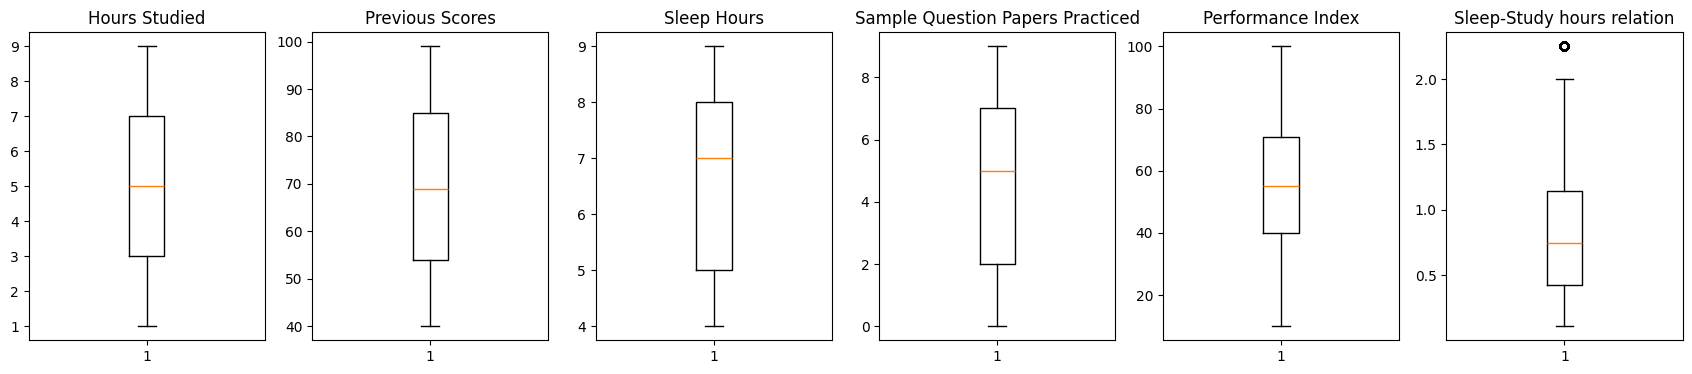

In [8]:
col_cnt = len(df.columns)
i = 1
plt.rcParams["figure.figsize"] = (25, 4)

for col in df.columns:
    if col == "Extracurricular Activities":
        continue
    plt.subplot(1, col_cnt, i)
    plt.boxplot(df[col])
    plt.title(col)
    i += 1

plt.show()

In [9]:
std_arr = df.std().to_numpy()
mean_arr = df.mean().to_numpy()

min_arr = df.min().to_numpy()
max_arr = df.max().to_numpy()

display(df.std())
display(df.mean())

Hours Studied                        2.589309
Previous Scores                     17.343152
Extracurricular Activities           0.499998
Sleep Hours                          1.695863
Sample Question Papers Practiced     2.867348
Performance Index                   19.212558
Sleep-Study hours relation           0.499870
dtype: float64

Hours Studied                        4.992900
Previous Scores                     69.445700
Extracurricular Activities           0.494800
Sleep Hours                          6.530600
Sample Question Papers Practiced     4.583300
Performance Index                   55.224800
Sleep-Study hours relation           0.823474
dtype: float64

In [10]:
for i, col in enumerate(df.columns):
    if col == "Extracurricular Activities" or "Performance Index":
        continue
    df[col] = (df[col] - min_arr[i]) / (max_arr[i] - min_arr[i])

In [11]:
display(df)
display(df.std())
display(df.mean())

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Sleep-Study hours relation
0,7,99,1,9,1,91.0,0.777778
1,4,82,0,4,2,65.0,1.000000
2,8,51,1,7,2,45.0,1.142857
3,5,52,1,5,2,36.0,1.000000
4,7,75,0,8,5,66.0,0.875000
...,...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0,0.250000
9996,7,64,1,8,5,58.0,0.875000
9997,6,83,1,8,5,74.0,0.750000
9998,9,97,1,7,0,95.0,1.285714


Hours Studied                        2.589309
Previous Scores                     17.343152
Extracurricular Activities           0.499998
Sleep Hours                          1.695863
Sample Question Papers Practiced     2.867348
Performance Index                   19.212558
Sleep-Study hours relation           0.499870
dtype: float64

Hours Studied                        4.992900
Previous Scores                     69.445700
Extracurricular Activities           0.494800
Sleep Hours                          6.530600
Sample Question Papers Practiced     4.583300
Performance Index                   55.224800
Sleep-Study hours relation           0.823474
dtype: float64

In [12]:
train_percent = 0.6
random_state = hash("9/11 bush is guilty") % (2**32 - 1)

train = df.sample(frac=train_percent, random_state=random_state)
test = df.drop(train.index)
train_x = train.drop("Performance Index", axis=1)
train_y = train["Performance Index"]
test_x = test.drop("Performance Index", axis=1)
test_y = test["Performance Index"]

In [13]:
class MultiLinearRegression:
    def __init__(self):
        self.w_arr = None

    def fit(self, fit_x, fit_y):
        fit_x = np.hstack((np.ones((fit_x.shape[0], 1)), fit_x))
        fit_y = fit_y.reshape(-1, 1)
        self.w_arr = np.linalg.inv(fit_x.T.dot(fit_x)).dot(fit_x.T).dot(fit_y)

    def predict(self, pred_x):
        pred_x = np.hstack((np.ones((pred_x.shape[0], 1)), pred_x))
        return pred_x.dot(self.w_arr)

In [14]:
mlr = MultiLinearRegression()
mlr.fit(train_x.to_numpy(), train_y.to_numpy())
pred_y = mlr.predict(test_x)

In [15]:
def calc_r2_score(y_test, y_pred):
    y_avg = np.mean(y_test)
    ss_ttl = sum((y_test - y_avg) ** 2)
    ss_res = sum((y_test - y_pred) ** 2)
    _r2 = 1 - ss_res / ss_ttl
    return _r2


In [16]:
feature_sets = [
    df.drop("Performance Index", axis = 1).columns,
    df.drop("Performance Index", axis = 1).drop("Extracurricular Activities", axis = 1).drop("Previous Scores", axis = 1).columns,
    df.drop("Performance Index", axis = 1).drop("Sample Question Papers Practiced", axis = 1).drop("Hours Studied", axis = 1).columns
]

for entry in feature_sets:
    
    mlr = MultiLinearRegression()
    mlr.fit(train_x[entry].to_numpy(), train_y.to_numpy())
    pred = mlr.predict(test_x[entry].to_numpy())
    r2 = calc_r2_score(test_y.values, pred.flatten())
    print(entry, r2)

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced',
       'Sleep-Study hours relation'],
      dtype='object') 0.988409079153322
Index(['Hours Studied', 'Sleep Hours', 'Sample Question Papers Practiced',
       'Sleep-Study hours relation'],
      dtype='object') 0.15280165233135723
Index(['Previous Scores', 'Extracurricular Activities', 'Sleep Hours',
       'Sleep-Study hours relation'],
      dtype='object') 0.9739823185093204
